In [107]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter

# 3

In [117]:
f = open("3.txt", "r")
d = f.read()
d = d.split("\n")
stack = []
for x in d: 
    l = int(len(x) / 2)
    stack.append([x[:l], x[l:]])
d = stack

In [73]:
def str_to_int(s):
    n = ord(s)
    if n < 92: 
        return n -38
    else:
        return n - 96

In [79]:
# a 
stack = []
for x in d: 
    for y in x[0]:
        if y in x[1]:
            stack.append(y)
            break

In [80]:
len(stack)
sum([str_to_int(x) for x in stack])

300

In [122]:
#b 
f = open("3.txt", "r")
d = f.read()
d = d.split("\n")
s = []
for x in range(0,len(d)-2, 3):
    s.append(d[x:x+3])
d = s
len(d)

100

In [123]:
def check(s):
    for l in s[0]:
        if (l in s[1]) and (l in s[2]):
            return l

In [127]:
sum([str_to_int(check(x)) for x in d])

2522

# 7 

In [36]:
# 7
from anytree import Node, RenderTree
from anytree import Node, RenderTree, AsciiStyle, PreOrderIter


f = open("7.txt", "r")
d = f.read()
print(d.count("/")) # doesnt jump back to root
d = d.split("$")
d= [x.split("\n") for x in d]



1


In [212]:
root = Node("root")
current = root
storage  =  {"root": root}
for n, x in enumerate(d[2:]):
    if "ls" == x[0][1:3]:
        for y in x[1:]:
            if y[:3] == "dir":
                    if str(current) + "/" + y[4:]  in storage: 
                        print("OOF")
                    storage[str(current)[:-2] + "/" + y[4:] + "')" ] = Node(y[4:], parent=current)
            elif len(y)> 0: #file
                if int(y.split(" ")[0]) in storage: 
                    print("AF")
                storage[str(current)[:-2] + "/" +  y.split(" ")[0]+ "')"] = Node(int(y.split(" ")[0]), parent=current)
    elif "cd .." in x[0]:
        current = current.parent
    elif "cd" in x[0]:
        current = storage[str(current)[:-2] + "/" + x[0][4:]+ "')"]
    else: 
         print("Uncatched case!")
         print(x)


#for pre, fill, node in RenderTree(root):
#    print("%s%s" % (pre, node.name))

In [218]:
#
c = 0
folders =[node for node in PreOrderIter(root) if not isinstance(node.name, int)]
for x in folders:
    if str(x) not in storage.keys():
        print(x)
    else:
        s = sum([y.name for y in storage[str(x)].leaves if isinstance(y.name, int)])
        if s <= 100000:
            c+= s
print(c)

Node('/root')
919137


In [222]:
x = "root"
30000000 - (70000000 - sum([y.name for y in storage[str(x)].leaves if isinstance(y.name, int)]))

2805968

In [223]:
#
import numpy as np
c = np.inf
folders =[node for node in PreOrderIter(root) if not isinstance(node.name, int)]
for x in folders:
    if str(x) not in storage.keys():
        print(x)
    else:
        s = sum([y.name for y in storage[str(x)].leaves if isinstance(y.name, int)])
        if s >= 2805968:
            if s < c:
                c = s 
print(c)

Node('/root')
2877389


# 2 

In [16]:
def get_points(r): 
    if r[1] == "X":
        p = 1
    elif r[1] == "Y":
        p = 2
    else:
        p = 3
        
    if  (r[0] == "A") and (r[1] =="X"):
        p+= 3
    elif  (r[0] == "B") and (r[1] =="Y"):
        p+= 3
    elif  (r[0] == "C") and (r[1] =="Z"):
        p+= 3
    elif (r[0] == "A") and (r[1] =="Y"):
        p += 6
    elif (r[0] == "B") and (r[1] =="Z"):
        p += 6
    elif (r[0] == "C") and (r[1] =="X"):
        p += 6
    else: 
        pass
    return p

In [26]:
def get_sol(r):
    if r[1] == "X":
        for sol in ["X", "Y", "Z"]: 
            if get_points([r[0], sol]) <= 3: 
                out =get_points([r[0], sol])
    elif r[1] == "Y":
        for sol in ["X", "Y", "Z"]: 
            if (get_points([r[0], sol]) <= 6) and (get_points([r[0], sol]) > 3) : 
                out = get_points([r[0], sol])
    
    else:
        for sol in ["X", "Y", "Z"]: 
            if (get_points([r[0], sol]) > 6): 
                out = get_points([r[0], sol])
    return out
            
        
        
    

In [29]:
sum([get_sol(x) for x in d])

14060

In [17]:
sum([get_points(x) for x in d])

10624

# 8

In [1]:
# 8
import numpy as np
f = open("8.txt", "r")
d = f.read()
d = d.split("\n")
d = [list(x) for x in d]
d = np.array(d).astype(int)

In [2]:
def run_visible(d):
    save = []
    for y in range(d.shape[0]):
        for x in range(d.shape[1]): 
            if x == 0: 
                save.append((y,x))
            elif d[y][x] > max(d[y][:x]):
                save.append((y,x))
            if x == d.shape[1] - 1: 
                save.append((y,x))
            elif d[y][x] > max(d[y][x+1:]):
                save.append((y,x))
    return set(save)

In [3]:
s1 = list(run_visible(d))
s2 = list(run_visible(d.T))
s2 = [tuple(reversed(list(x))) for x in s2]
len(set(s1 + s2))

1705

In [19]:
#b
def count(d):
    length = np.ones(d.shape)
    for y in range(d.shape[0]):
        for x in range(d.shape[1]): 


            
            c = d[y,x]
            l= np.flip(d[y,:x])
            r =d[y,x+1:]

            if len(r) > 0:
                for nr in range(len(r)):
                    if r[nr] >= c: 
                        break
                length[y,x] = length[y,x] * (nr+1)

            if len(l) > 0:
                for nl in range(len(l)):
                    if l[nl] >= c: 
                        break
                length[y,x] = length[y,x] * (nl+1)
            
    return length

In [20]:
s1 = count(d)
s2 = count(d.T).T

In [33]:
np.multiply(s1,s2).max()

371200.0

# 9

In [311]:
import numpy as np
f = open("9.txt", "r")
d = f.read()
d = d.split("\n")
d = [x.split(" ") for x in d]
import matplotlib.pyplot as plt

In [294]:
def update_tail(cH, cT):

    # nothing happens: 
    # check which case: 
    dist  = np.abs(cH - cT)
    # nothing
    if dist.max() < 2: 
        pass
    # non diagonal
    elif 0 in dist: 

        # up
        if dist[1] == 0: 
            cT[0] += (cH[0] - cT[0]) / 2
        #hori
        elif dist[0] == 0: 
            cT[1] += (cH[1] - cT[1]) / 2        
        else: 
            print("YEET")
    # catch case
    elif 3 in dist: 
        print("OOF. Broken")
    # diagonal
    else:
        j = np.sign(cH - cT)
        cT += j
    return cT

6642


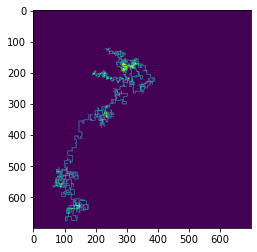

In [318]:
size = (700,700)
currentH = np.array([200,200])
currentT = np.array([200,200])
field = np.zeros(size).astype(bool)
field[200,200] = True
for step in d: 
    for n in range(int(step[1])): 
        if step[0] == "U":
            currentH[0] -=1
        elif step[0] == "D":
            currentH[0] +=1
        elif step[0] == "R":
            currentH[1] +=1
        elif step[0] == "L":
            currentH[1] -=1
        else:
            print("OOF")

        currentT = update_tail(currentH, currentT)
        field[currentT[0], currentT[1]] = True
plt.imshow(field)
print(field.sum())

2765


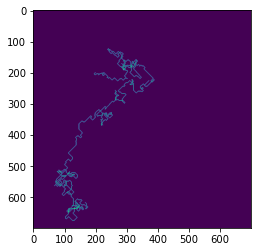

In [317]:
# b 
size = (700,700)
ropePos = np.repeat(np.array([[200,200]]),10,).reshape(10,2)

field = np.zeros(size).astype(bool)
field[200,200] = True
for step in d: 
    for n in range(int(step[1])): 
        if step[0] == "U":
            ropePos[0][0] -=1
        elif step[0] == "D":
            ropePos[0][0] +=1
        elif step[0] == "R":
            ropePos[0][1] +=1
        elif step[0] == "L":
            ropePos[0][1] -=1
        else:
            print("OOF")
        for l in range(1,len(ropePos)):
            ropePos[l] = update_tail(ropePos[l-1], ropePos[l])
        field[ropePos[-1][0], ropePos[-1][1]] = True
plt.imshow(field)
print(field.sum())


# 10

In [156]:
import numpy as np
import matplotlib.pyplot as plt
f = open("10.txt", "r")
d = f.read()
d = d.split("\n")

In [157]:
#a
hist = [np.nan] * 500
hist[0] = 1
current  = 1
for x in d: 
    if "addx" in x:
        v = int(x.split(" ")[1])
        hist[current] = hist[current-1]
        hist[current+1] = hist[current-1] + v
        current += 2

    elif "noop" in x:
        hist[current] = hist[current-1]
        current += 1
sum([hist[x-1] * x for x in [20,60,100,140,180,220]])


13740

In [167]:
#W
draw = []
for x in range(240):
    if hist[x] == x%40:
        draw.append(True)
    elif hist[x] == (x +1)%40:
        draw.append(True)
    elif hist[x] == (x -1)%40:
        draw.append(True)
    else:
        draw.append(False)

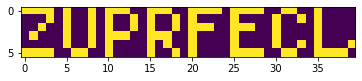

In [168]:
plt.imshow(np.array(draw).reshape(6,40))

# 12

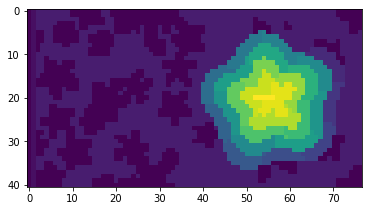

In [125]:
# 12
import matplotlib.pyplot as plt
import numpy as np
f = open("12.txt", "r")
d = f.read()
d = d.split("\n")
stack = []
for row in d: 
    stack.append([ord(x) - 97 for x in row])
d = np.array(stack)
start = np.array([np.where(d == -14)[0][0], np.where(d == -14)[1][0]])
end = np.array([np.where(d == -28)[0][0], np.where(d == -28)[1][0]])
d[d == -14] = 0 # start
d[d == -28] = 25 # end
plt.imshow(d)

In [126]:
distMap = np.zeros(d.shape) 
distMap[:] = np.inf

In [128]:
def calc_one_step(d): 
    for x in range(len(d)): 
        for y in range(len(d[0])): 
            if np.all(np.array([x,y]) == end):
                distMap[x,y] = 0
            else:
                options = []
                if x+1 < len(d):
                    if not d[x,y]+1 < d[x+1,y]:
                        options.append(distMap[x+1,y])
                if x-1 > -1:
                    if not d[x,y]+1 < d[x-1,y]:
                        options.append(distMap[x-1,y])
                if y+1 < len(d[0]):
                    if not d[x,y]+1 < d[x,y+1]:
                        options.append(distMap[x,y+1])
                if y-1 > -1:
                    if not d[x,y]+1 < d[x,y-1]:
                        options.append(distMap[x,y-1])
                options = np.array(options)

                if options.min() == np.inf: 
                    pass
                else: 
                    distMap[x,y] = options.min() + 1


In [129]:
distMap = np.zeros(d.shape) 
distMap[:] = np.inf
for x in range(500):
    calc_one_step(d)

In [146]:
stack = np.where(d==0)
min([(distMap[stack[0][x], stack[1][x]]) for x in range(len(stack[0]))])

388.0

# 13

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import ast
f = open("13_1.txt", "r")
d = f.read()
d = d.split("\n\n")
d  = [x.split("\n") for x in d]
d = [[ast.literal_eval(x[0]),ast.literal_eval(x[1])] for x in d]

In [124]:
def compare(l):
    #print(l)
    a  = l[0]
    b = l[1]

    if (type(a) is int) and (type(b) is int):
        if a < b: 
            return 1
        elif b < a:
            return -1
        else: 
            return 0

    elif (type(a) is int) and (type(b) is list):
        return compare([[a],b])

    elif (type(a) is list) and (type(b) is int):
        return compare([a,[b]])

    if (type(a) is list) and (type(b) is list):


        for x in range(min(len(a), len(b))):
            res = compare([a[x], b[x]])
            if res == 0 : 
                continue
            else: 
                return res
        if len(a) < len(b):
            return 1
        
        elif len(a) == len(b):
            return 0 

        else: 
            return -1

In [128]:
res = np.array([(compare(x)) for x in d])

In [135]:
sum(np.where(res == 1)[0] + 1)

5555

In [148]:
#b
# Put all packages into giant list
stack = []
for x in d: 
    for y in x: 
        stack.append(y)
stack.append([[6]])
stack.append([[2]])

In [149]:
stack

[[1, 1, 3, 1, 1],
 [1, 1, 5, 1, 1],
 [[1], [2, 3, 4]],
 [[1], 4],
 [9],
 [[8, 7, 6]],
 [[4, 4], 4, 4],
 [[4, 4], 4, 4, 4],
 [7, 7, 7, 7],
 [7, 7, 7],
 [],
 [3],
 [[[]]],
 [[]],
 [1, [2, [3, [4, [5, 6, 7]]]], 8, 9],
 [1, [2, [3, [4, [5, 6, 0]]]], 8, 9],
 [[6]],
 [[2]]]

In [150]:
# lets make the most naive sorting algorithm possible: 
correct = True
count = 0
while not correct:
    correct = True
    for x in range(len(stack)-1):
        res = compare([stack[x], stack[x+1]])
        if res == 1: 
            pass
        else: 
            correct = False
            a = stack[x]
            b = stack[x+1]
            stack[x] = b
            stack[x+1] = a
print(correct)

True


In [151]:
stack

[[],
 [[]],
 [[[]]],
 [1, 1, 3, 1, 1],
 [1, 1, 5, 1, 1],
 [[1], [2, 3, 4]],
 [1, [2, [3, [4, [5, 6, 0]]]], 8, 9],
 [1, [2, [3, [4, [5, 6, 7]]]], 8, 9],
 [[1], 4],
 [[2]],
 [3],
 [[4, 4], 4, 4],
 [[4, 4], 4, 4, 4],
 [[6]],
 [7, 7, 7],
 [7, 7, 7, 7],
 [[8, 7, 6]],
 [9]]

In [117]:
compare(d[3])

[[[4, 4], 4, 4], [[4, 4], 4, 4, 4]]
[[4, 4], [4, 4]]
[4, 4]
[4, 4]
[4, 4]
[4, 4]


-1

In [ ]:
def parse_line(l):
    ast.literal_eval(


In [12]:
d[-1][0]

'[1,[2,[3,[4,[5,6,7]]]],8,9]'

In [17]:
ast.literal_eval(d[-1][0])[1][0]

2

In [27]:
depth = lambda L: isinstance(d, list) and max(map(d, L))+1

In [28]:
depth

<function __main__.<lambda>(L)>